In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("/content/DataDNA Dataset Challenge - E-commerce Dataset - November 2025.xlsx")

In [3]:
df.head()

,event_id,event_type,event_date,customer_id,product_id,country,latitude,longitude,region,channel,...,unit_price_local,discount_code,discount_local,tax_local,net_revenue_local,fx_rate_to_usd,net_revenue_usd,is_refunded,refund_datetime,refund_reason
0,DB4F1A096586,order,2024-12-09 00:11:27,CUST0001946,PROD0083,United States,39.8283,-98.5795,NaN,Website,...,36.70,NaN,0.0,0.00,110.10,1.00,110.10,False,NaT,NaN
1,3550A69EEA36,order,2025-08-11 21:31:03,CUST0003776,PROD0049,Australia,-25.2744,133.7751,APAC,Website,...,19.70,NaN,0.0,9.85,108.35,0.66,71.51,False,NaT,NaN
2,0C3CAE65E90C,order,2025-09-30 15:39:28,CUST0001105,PROD0075,Canada,56.1304,-106.3468,NaN,Website,...,20.12,NaN,0.0,1.01,21.13,1.00,21.13,False,NaT,NaN
3,7DDC83355865,invoice,2024-09-26 04:13:11,CUST0003164,PROD0017,United States,39.8283,-98.5795,NaN,Partner,...,19.00,NaN,0.0,0.00,190.00,1.00,190.00,False,NaT,NaN
4,DAE0B37D8815,order,2024-06-23 16:03:04,CUST0003410,PROD0099,United States,39.8283,-98.5795,NaN,Website,...,29.38,NaN,0.0,0.00,88.14,1.00,88.14,False,NaT,NaN


In [4]:
df.columns

Index(['event_id', 'event_type', 'event_date', 'customer_id', 'product_id',
       'country', 'latitude', 'longitude', 'region', 'channel',
       'payment_method', 'currency', 'quantity', 'unit_price_local',
       'discount_code', 'discount_local', 'tax_local', 'net_revenue_local',
       'fx_rate_to_usd', 'net_revenue_usd', 'is_refunded', 'refund_datetime',
       'refund_reason'],
      dtype='object')

In [5]:
df.shape

(48000, 23)

In [6]:
df.dtypes

,0
event_id,object
event_type,object
event_date,datetime64[ns]
customer_id,object
product_id,object
country,object
latitude,float64
longitude,float64
region,object
channel,object


In [7]:
df.isnull().sum()

,0
event_id,0
event_type,0
event_date,0
customer_id,0
product_id,0
country,0
latitude,0
longitude,0
region,19579
channel,0


In [8]:
# So the missing region is replacable by unknown
# the discount code is missing. that may be because the dont get
# any discount - so we can replace it by no_discount
# refund datetime not mention _ because the refund datetime and
# refund reason are the products which is not refunded
# thats why they didnt mention the date and also the reason.

In [9]:
# so lets fill the missing

In [10]:
df['region'] = df['region'].fillna("Unknown")

In [11]:
df['discount_code'] = df['discount_code'].fillna("No_Discount")

In [12]:
df['refund_reason'] = df['refund_reason'].fillna("Not_Refunded")

In [13]:
# verify the missing values

In [14]:
df.isnull().sum()

,0
event_id,0
event_type,0
event_date,0
customer_id,0
product_id,0
country,0
latitude,0
longitude,0
region,0
channel,0


In [15]:
# refund_datetime is intentinally showing	46995, that mean 46995
# orders are not refunded yet.

In [16]:
df.head(1)

,event_id,event_type,event_date,customer_id,product_id,country,latitude,longitude,region,channel,...,unit_price_local,discount_code,discount_local,tax_local,net_revenue_local,fx_rate_to_usd,net_revenue_usd,is_refunded,refund_datetime,refund_reason
0,DB4F1A096586,order,2024-12-09 00:11:27,CUST0001946,PROD0083,United States,39.8283,-98.5795,Unknown,Website,...,36.7,No_Discount,0.0,0.0,110.1,1.0,110.1,False,NaT,Not_Refunded


In [17]:
# lets find out the objects columns

In [18]:
df.select_dtypes(include=["object"]).columns

Index(['event_id', 'event_type', 'customer_id', 'product_id', 'country',
       'region', 'channel', 'payment_method', 'currency', 'discount_code',
       'refund_reason'],
      dtype='object')

In [19]:
cat_col = ['event_id', 'event_type', 'customer_id', 'product_id', 'country',
       'region', 'channel', 'payment_method', 'currency', 'discount_code',
       'refund_reason']

In [20]:
for i in cat_col:
  print(i, " : - ", df[i].unique() )
  print(".............................")

event_id  : -  ['DB4F1A096586' '3550A69EEA36' '0C3CAE65E90C' ... '31681CA1A687'
 'E5332EABFA60' '64381905AD06']
.............................
event_type  : -  ['order' 'invoice']
.............................
customer_id  : -  ['CUST0001946' 'CUST0003776' 'CUST0001105' ... 'CUST0001996' 'CUST0001296'
 'CUST0003384']
.............................
product_id  : -  ['PROD0083' 'PROD0049' 'PROD0075' 'PROD0017' 'PROD0099' 'PROD0026'
 'PROD0059' 'PROD0100' 'PROD0027' 'PROD0067' 'PROD0047' 'PROD0055'
 'PROD0078' 'PROD0074' 'PROD0076' 'PROD0053' 'PROD0003' 'PROD0033'
 'PROD0020' 'PROD0022' 'PROD0012' 'PROD0087' 'PROD0002' 'PROD0019'
 'PROD0025' 'PROD0029' 'PROD0041' 'PROD0077' 'PROD0023' 'PROD0035'
 'PROD0006' 'PROD0052' 'PROD0089' 'PROD0086' 'PROD0050' 'PROD0046'
 'PROD0072' 'PROD0008' 'PROD0007' 'PROD0080' 'PROD0039' 'PROD0084'
 'PROD0011' 'PROD0062' 'PROD0063' 'PROD0037' 'PROD0095' 'PROD0001'
 'PROD0048' 'PROD0090' 'PROD0042' 'PROD0082' 'PROD0060' 'PROD0073'
 'PROD0038' 'PROD0014' 'PROD0066

In [21]:
# lets do the feature engg.
# drop the event_id, customer_id, product_id

In [22]:
df.drop(columns=['event_id', 'customer_id', 'product_id'], inplace=True)

In [23]:
df.head()

,event_type,event_date,country,latitude,longitude,region,channel,payment_method,currency,quantity,unit_price_local,discount_code,discount_local,tax_local,net_revenue_local,fx_rate_to_usd,net_revenue_usd,is_refunded,refund_datetime,refund_reason
0,order,2024-12-09 00:11:27,United States,39.8283,-98.5795,Unknown,Website,Credit Card,USD,3,36.70,No_Discount,0.0,0.00,110.10,1.00,110.10,False,NaT,Not_Refunded
1,order,2025-08-11 21:31:03,Australia,-25.2744,133.7751,APAC,Website,Invoice,AUD,5,19.70,No_Discount,0.0,9.85,108.35,0.66,71.51,False,NaT,Not_Refunded
2,order,2025-09-30 15:39:28,Canada,56.1304,-106.3468,Unknown,Website,Credit Card,USD,1,20.12,No_Discount,0.0,1.01,21.13,1.00,21.13,False,NaT,Not_Refunded
3,invoice,2024-09-26 04:13:11,United States,39.8283,-98.5795,Unknown,Partner,Credit Card,USD,10,19.00,No_Discount,0.0,0.00,190.00,1.00,190.00,False,NaT,Not_Refunded
4,order,2024-06-23 16:03:04,United States,39.8283,-98.5795,Unknown,Website,Credit Card,USD,3,29.38,No_Discount,0.0,0.00,88.14,1.00,88.14,False,NaT,Not_Refunded


In [24]:
# lets check the duplicate records

df.duplicated().sum()

np.int64(0)

In [25]:
# lets start for EDA  -

In [26]:
df.columns

Index(['event_type', 'event_date', 'country', 'latitude', 'longitude',
       'region', 'channel', 'payment_method', 'currency', 'quantity',
       'unit_price_local', 'discount_code', 'discount_local', 'tax_local',
       'net_revenue_local', 'fx_rate_to_usd', 'net_revenue_usd', 'is_refunded',
       'refund_datetime', 'refund_reason'],
      dtype='object')

In [27]:
# lests check fro the event types

In [28]:
df['event_type'].unique()

array(['order', 'invoice'], dtype=object)

In [29]:
df['event_type'].value_counts()

,count
event_type,
order,33601
invoice,14399


In [30]:
df.groupby("event_type")['net_revenue_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
event_type,,,,,,,,
invoice,14399.0,651.337073,1174.999209,4.0,53.90,196.28,660.01,14969.85
order,33601.0,668.244367,1194.135810,4.0,55.02,200.00,687.36,14970.13


In [31]:
df['is_refunded'].unique()

array([False,  True])

In [32]:
df.groupby("event_type")['is_refunded'].value_counts().unstack()

is_refunded,False,True
event_type,,
invoice,14083,316
order,32912,689


<Axes: xlabel='event_type', ylabel='count'>

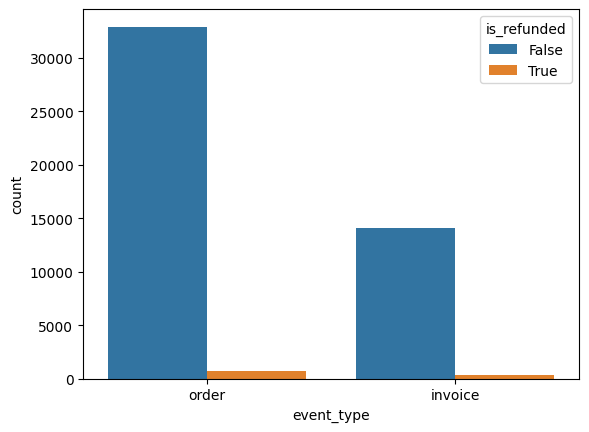

In [33]:
sns.countplot(data= df, x="event_type", hue="is_refunded")

In [34]:
df.groupby("event_type")['payment_method'].value_counts().unstack()

payment_method,Credit Card,Invoice,PayPal,Wire
event_type,,,,
invoice,7958,3575,2138,728
order,18382,8480,5077,1662


In [35]:
df.groupby(["event_type",'payment_method'])["is_refunded"].value_counts().unstack()

is_refunded                False  True 
event_type payment_method              
invoice    Credit Card      7783    175
           Invoice          3504     71
           PayPal           2087     51
           Wire              709     19
order      Credit Card     18001    381
           Invoice          8315    165
           PayPal           4976    101
           Wire             1620     42

In [36]:
stack = df.groupby(["event_type",'payment_method'])["is_refunded"].value_counts().unstack()

<Axes: xlabel='event_type,payment_method'>

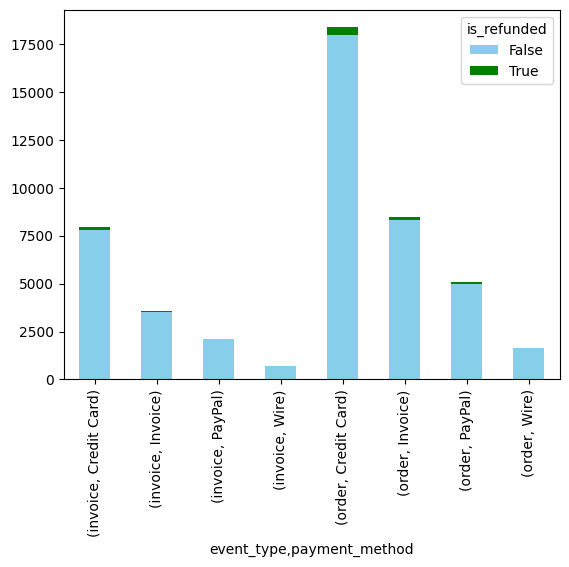

In [37]:
stack.plot(kind='bar', stacked=True, color=['skyblue', 'green'])

In [38]:
# channel

In [39]:
df['channel'].unique()

array(['Website', 'Partner', 'Direct Sales', 'Marketplace', 'Reseller'],
      dtype=object)

In [40]:
df.columns

Index(['event_type', 'event_date', 'country', 'latitude', 'longitude',
       'region', 'channel', 'payment_method', 'currency', 'quantity',
       'unit_price_local', 'discount_code', 'discount_local', 'tax_local',
       'net_revenue_local', 'fx_rate_to_usd', 'net_revenue_usd', 'is_refunded',
       'refund_datetime', 'refund_reason'],
      dtype='object')

In [41]:
#What us total no. of record, & unique

In [42]:
df.shape

(48000, 20)

In [43]:
len(df)

48000

In [44]:
# Total record is 48000

In [45]:
df['event_type'].unique()

array(['order', 'invoice'], dtype=object)

In [46]:
# 3 - Time range of dataset

In [47]:
min_date = df["event_date"].min()

In [48]:
max_date = df["event_date"].max()

In [49]:
print("The Range is from", min_date ,"to",max_date)

The Range is from 2024-04-22 00:09:01 to 2025-10-21 23:56:20


In [50]:
print(f"The Range is from {min_date} to {max_date}")

The Range is from 2024-04-22 00:09:01 to 2025-10-21 23:56:20


In [51]:
# 4- Duplicate or missing data

In [52]:
df.duplicated().sum()

np.int64(0)

In [53]:
df.isnull().sum()

,0
event_type,0
event_date,0
country,0
latitude,0
longitude,0
region,0
channel,0
payment_method,0
currency,0
quantity,0


In [54]:
for i in ["event_date", "country", "net_revenue_usd"]:
  print(f"duplicated valus in {i} is ", df[i].duplicated().sum())
  print(f"Missing values in {i} is", df[i].isnull().sum())
  print("................................................")

duplicated valus in event_date is  24
Missing values in event_date is 0
................................................
duplicated valus in country is  47990
Missing values in country is 0
................................................
duplicated valus in net_revenue_usd is  42717
Missing values in net_revenue_usd is 0
................................................


In [55]:
# Country by most total revenue


In [56]:
rev = df.groupby("country")["net_revenue_usd"].sum().sort_values(ascending=False)

In [57]:
top5 = rev.head(5)

In [58]:
top5

,net_revenue_usd
country,
United States,8576828.53
United Kingdom,5035009.06
Canada,3194218.95
Australia,3192846.14
Germany,2685114.73


In [59]:
top5 = top5.reset_index()

/tmp/ipython-input-1193901654.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= top5, x= "country", y="net_revenue_usd",


<Axes: xlabel='country', ylabel='net_revenue_usd'>

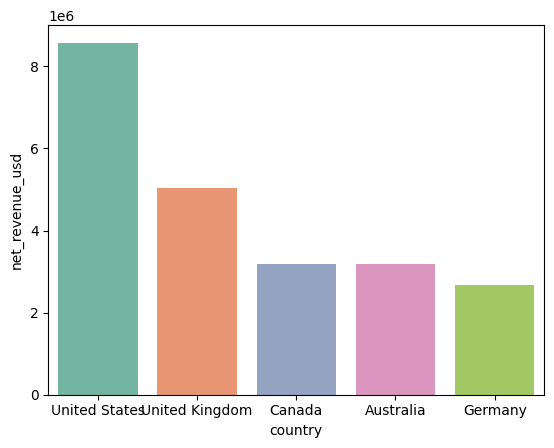

In [60]:
sns.barplot(data= top5, x= "country", y="net_revenue_usd",
            palette="Set2")

In [61]:
# 6 - average value of net revenue

In [62]:
df.groupby("region")["net_revenue_usd"].mean().sort_values(ascending=False)

,net_revenue_usd
region,
LATAM,719.426145
EU,719.146201
APAC,667.380385
Unknown,601.207798


In [63]:
avg = df.groupby("region")["net_revenue_usd"].mean().sort_values(ascending=False).reset_index()

In [64]:
avg

,region,net_revenue_usd
0,LATAM,719.426145
1,EU,719.146201
2,APAC,667.380385
3,Unknown,601.207798


/tmp/ipython-input-3713562040.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= avg, x="region", y="net_revenue_usd", palette="viridis")


<Axes: xlabel='region', ylabel='net_revenue_usd'>

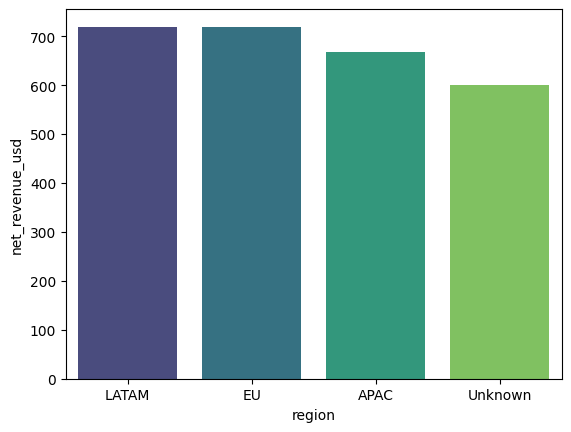

In [65]:
sns.barplot(data= avg, x="region", y="net_revenue_usd", palette="viridis")

In [66]:
df.groupby("country")["net_revenue_usd"].mean().sort_values(ascending=False).reset_index()

,country,net_revenue_usd
0,Germany,748.568366
1,Spain,731.515109
2,France,731.454975
3,Netherlands,723.885208
4,Brazil,719.426145
5,United Kingdom,693.336417
6,Philippines,681.390668
7,Australia,660.224595
8,Canada,659.417620
9,United States,582.071838


In [67]:
avg1 = df.groupby("country")["net_revenue_usd"].mean().sort_values(ascending=False).reset_index()

In [68]:
avg1 = avg1.head(5)

In [69]:
avg1

,country,net_revenue_usd
0,Germany,748.568366
1,Spain,731.515109
2,France,731.454975
3,Netherlands,723.885208
4,Brazil,719.426145


/tmp/ipython-input-2414920633.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= avg1, x="country", y="net_revenue_usd", palette="viridis")


<Axes: xlabel='country', ylabel='net_revenue_usd'>

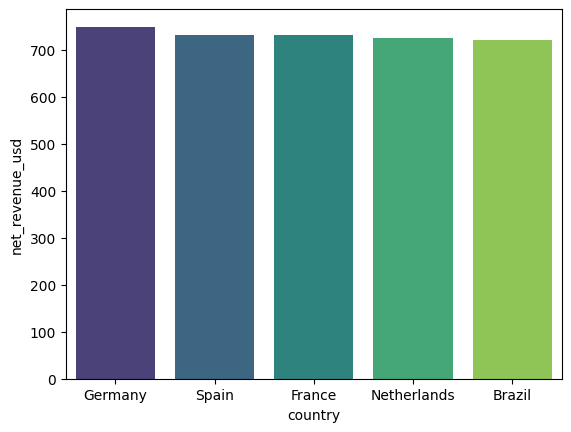

In [70]:
sns.barplot(data= avg1, x="country", y="net_revenue_usd", palette="viridis")

In [71]:
# 7 -no. od order varry accross region and country

In [72]:
df['region'].value_counts().sort_values()

,count
region,
LATAM,2075
APAC,7306
EU,19040
Unknown,19579


In [73]:
reg = df['region'].value_counts().sort_values().reset_index()

In [74]:
reg

,region,count
0,LATAM,2075
1,APAC,7306
2,EU,19040
3,Unknown,19579


<Axes: xlabel='region', ylabel='count'>

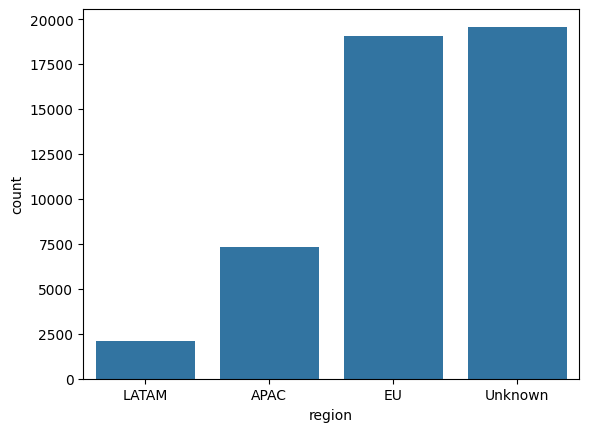

In [75]:
sns.barplot(data= reg, x ="region", y="count")

In [76]:
df['country'].value_counts().sort_values()

,count
country,
Brazil,2075
Spain,2335
Philippines,2470
Netherlands,2519
France,3337
Germany,3587
Australia,4836
Canada,4844
United Kingdom,7262


In [77]:
reg1 = df['country'].value_counts().sort_values().reset_index()

In [78]:
reg1

,country,count
0,Brazil,2075
1,Spain,2335
2,Philippines,2470
3,Netherlands,2519
4,France,3337
5,Germany,3587
6,Australia,4836
7,Canada,4844
8,United Kingdom,7262
9,United States,14735


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Brazil'),
  Text(1, 0, 'Spain'),
  Text(2, 0, 'Philippines'),
  Text(3, 0, 'Netherlands'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Germany'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'Canada'),
  Text(8, 0, 'United Kingdom'),
  Text(9, 0, 'United States')])

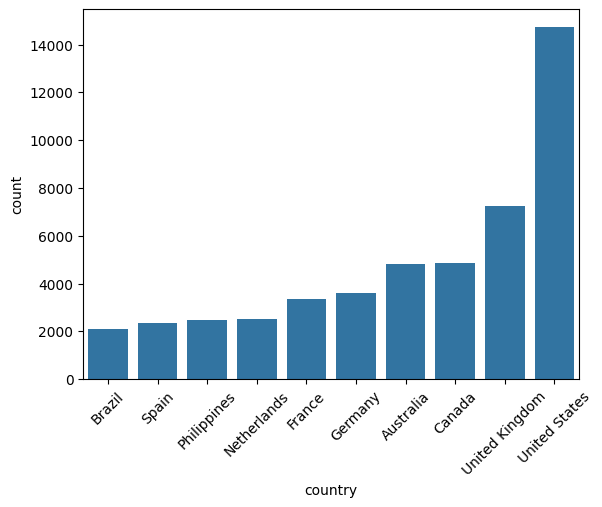

In [79]:
sns.barplot(data= reg1, x ="country", y="count")
plt.xticks(rotation=45)

In [80]:
#8 - which country highest refund rate

In [81]:
df.groupby("country")["is_refunded"].mean().sort_values(ascending=False)*100

,is_refunded
country,
Brazil,2.457831
Canada,2.374071
Australia,2.315964
Germany,2.202398
United Kingdom,2.161939
France,2.067726
Netherlands,1.984915
United States,1.954530
Spain,1.798715


In [82]:
high = df.groupby("country")["is_refunded"].mean().sort_values(ascending=False)*100

In [83]:
high = high.head(5)

In [84]:
high

,is_refunded
country,
Brazil,2.457831
Canada,2.374071
Australia,2.315964
Germany,2.202398
United Kingdom,2.161939


In [85]:
high = high.reset_index()

In [86]:
high

,country,is_refunded
0,Brazil,2.457831
1,Canada,2.374071
2,Australia,2.315964
3,Germany,2.202398
4,United Kingdom,2.161939


/tmp/ipython-input-1518954058.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= high , x="is_refunded", y="country", palette="mako")


<Axes: xlabel='is_refunded', ylabel='country'>

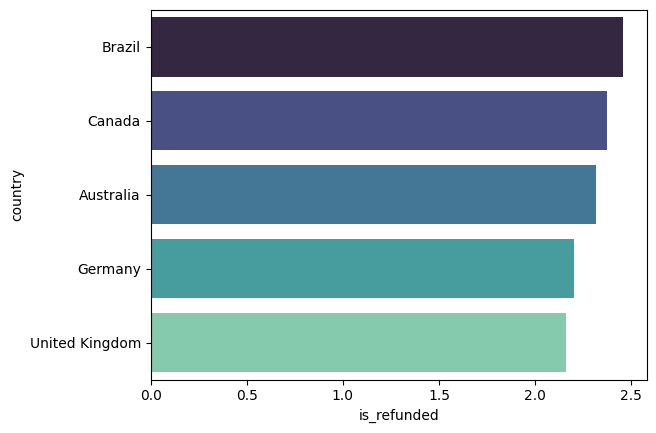

In [87]:
sns.barplot(data= high , x="is_refunded", y="country", palette="mako")

In [88]:
# 9 - channesl - trandaction and revenue

In [89]:
df.columns

Index(['event_type', 'event_date', 'country', 'latitude', 'longitude',
       'region', 'channel', 'payment_method', 'currency', 'quantity',
       'unit_price_local', 'discount_code', 'discount_local', 'tax_local',
       'net_revenue_local', 'fx_rate_to_usd', 'net_revenue_usd', 'is_refunded',
       'refund_datetime', 'refund_reason'],
      dtype='object')

In [90]:
df['channel'].value_counts()

,count
channel,
Website,21549
Direct Sales,9792
Reseller,6914
Partner,4884
Marketplace,4861


In [91]:
trans = df.groupby("channel")["net_revenue_usd"].sum().sort_values()

In [92]:
trans =  trans.reset_index()

In [93]:
trans

,channel,net_revenue_usd
0,Partner,3252220.81
1,Marketplace,3344149.16
2,Reseller,4455871.00
3,Direct Sales,6359903.49
4,Website,14420137.02


/tmp/ipython-input-4212903495.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= trans , x="channel", y="net_revenue_usd", palette="mako")


<Axes: xlabel='channel', ylabel='net_revenue_usd'>

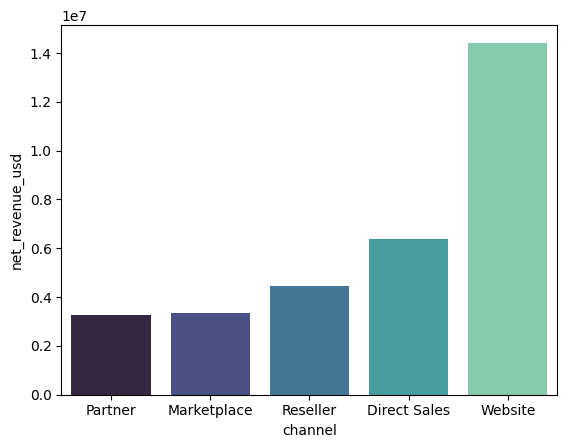

In [94]:
sns.barplot(data= trans , x="channel", y="net_revenue_usd", palette="mako")

In [95]:
#10 - payment method frequncy accross region

In [96]:
df.columns

Index(['event_type', 'event_date', 'country', 'latitude', 'longitude',
       'region', 'channel', 'payment_method', 'currency', 'quantity',
       'unit_price_local', 'discount_code', 'discount_local', 'tax_local',
       'net_revenue_local', 'fx_rate_to_usd', 'net_revenue_usd', 'is_refunded',
       'refund_datetime', 'refund_reason'],
      dtype='object')

In [97]:
df["payment_method"].unique()

array(['Credit Card', 'Invoice', 'Wire', 'PayPal'], dtype=object)

In [98]:
df["payment_method"].value_counts()

,count
payment_method,
Credit Card,26340
Invoice,12055
PayPal,7215
Wire,2390


In [99]:
df.groupby("region")["payment_method"].value_counts().unstack()

payment_method,Credit Card,Invoice,PayPal,Wire
region,,,,
APAC,3973,1843,1131,359
EU,10476,4745,2882,937
LATAM,1155,508,313,99
Unknown,10736,4959,2889,995


In [100]:
# relationship between payment method and refund probability

In [101]:
rel = df.groupby("payment_method")["is_refunded"].mean()*100

In [102]:
rel = rel.reset_index()

In [103]:
rel

,payment_method,is_refunded
0,Credit Card,2.110858
1,Invoice,1.957694
2,PayPal,2.106722
3,Wire,2.552301


In [104]:
# 12  avg order value by channel & pament method

In [105]:
channel = df.groupby('channel')['net_revenue_usd'].mean().sort_values(ascending=False)

In [106]:
channel = channel.reset_index()

In [107]:
channel

,channel,net_revenue_usd
0,Marketplace,687.954980
1,Website,669.178942
2,Partner,665.892877
3,Direct Sales,649.499948
4,Reseller,644.470784


In [108]:
pay_method = df.groupby('payment_method')['net_revenue_usd'].mean().sort_values(ascending=False)

In [109]:
pay_method = pay_method.reset_index()

In [110]:
pay_method

,payment_method,net_revenue_usd
0,Credit Card,676.549828
1,Wire,655.979816
2,Invoice,647.913994
3,PayPal,642.212618


In [111]:
Q1 = df["net_revenue_usd"].quantile(0.25)

In [112]:
Q1

np.float64(54.34)

In [113]:
Q3 = df["net_revenue_usd"].quantile(0.75)

In [114]:
Q3

np.float64(675.46)

In [115]:
IQR = Q3 - Q1

In [116]:
IQR

np.float64(621.12)

In [117]:
Lower_bound = Q1 - 1.5 * IQR

In [118]:
Lower_bound

np.float64(-877.34)

In [119]:
Upper_Bound = Q3 + 1.5 * IQR

In [120]:
Upper_Bound

np.float64(1607.14)

<Axes: ylabel='net_revenue_usd'>

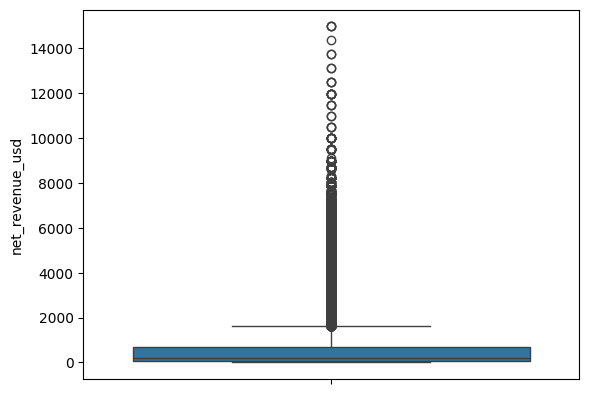

In [121]:
sns.boxplot(df['net_revenue_usd'])

In [122]:
df.columns

Index(['event_type', 'event_date', 'country', 'latitude', 'longitude',
       'region', 'channel', 'payment_method', 'currency', 'quantity',
       'unit_price_local', 'discount_code', 'discount_local', 'tax_local',
       'net_revenue_local', 'fx_rate_to_usd', 'net_revenue_usd', 'is_refunded',
       'refund_datetime', 'refund_reason'],
      dtype='object')

In [123]:
df['event_date'].dtype

dtype('<M8[ns]')

In [124]:
df["Month"] = df['event_date'].dt.to_period("M")

In [125]:
df["Month"].head(5)

,Month
0,2024-12
1,2025-08
2,2025-09
3,2024-09
4,2024-06


In [128]:
df.groupby ('discount_code')['net_revenue_usd'].describe().sort_values("count", ascending=False)

,count,mean,std,min,25%,50%,75%,max
discount_code,,,,,,,,
No_Discount,31020.0,686.895852,1228.189349,5.00,56.35,209.880,708.5925,14970.13
WELCOME10,2730.0,634.749513,1152.412599,4.50,54.00,195.030,659.1725,13722.36
NEWCUSTOMER10,2700.0,654.848744,1156.979381,4.50,63.00,210.000,675.0000,10977.89
BFCM10,2665.0,591.070120,1071.875655,4.50,54.32,180.050,590.5000,8982.00
SAVE5,2662.0,655.604523,1173.987793,4.75,57.00,184.000,675.4500,14346.37
BFCM20,2649.0,573.468830,1040.640509,4.00,49.00,180.120,587.6000,12474.88
LOYALTY15,1819.0,651.491875,1151.912435,4.50,52.48,189.050,673.4300,10478.90
SALE15,817.0,511.553244,880.299147,4.25,41.65,171.020,574.1300,6353.75
EDU15,167.0,601.810000,1016.033074,5.25,36.35,142.510,617.0350,6279.10


In [130]:
df.columns

Index(['event_type', 'event_date', 'country', 'latitude', 'longitude',
       'region', 'channel', 'payment_method', 'currency', 'quantity',
       'unit_price_local', 'discount_code', 'discount_local', 'tax_local',
       'net_revenue_local', 'fx_rate_to_usd', 'net_revenue_usd', 'is_refunded',
       'refund_datetime', 'refund_reason', 'Month'],
      dtype='object')

In [135]:
from numpy.random import normal
df.groupby(["country","currency"])["tax_local"].mean().sort_values(ascending=False)

,,tax_local
country,currency,
Germany,EUR,122.208570
France,EUR,119.584363
Spain,EUR,119.443011
Netherlands,EUR,117.565022
United Kingdom,GBP,98.156075
Brazil,USD,97.378299
Australia,AUD,94.721696
Philippines,USD,92.650543
Canada,USD,32.590093


In [137]:
monthly_Rev = df.groupby("Month")["net_revenue_usd"].sum()

Text(0, 0.5, 'Monthly revenue usd')

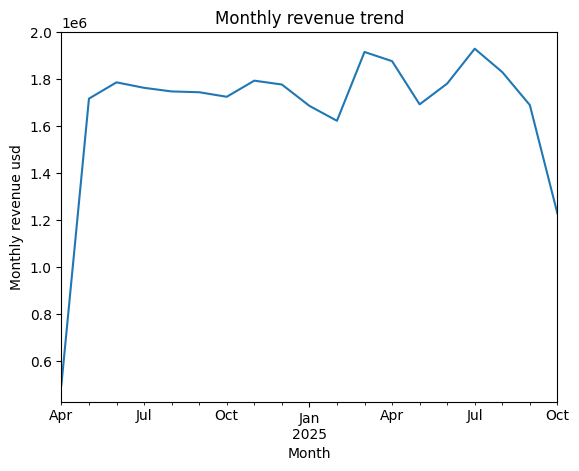

In [139]:
monthly_Rev.plot()
plt.title("Monthly revenue trend")
plt.ylabel("Monthly revenue usd")

In [141]:
df["weekday"] = df["event_date"].dt.day_name()

In [142]:
df.head()

,event_type,event_date,country,latitude,longitude,region,channel,payment_method,currency,quantity,...,discount_local,tax_local,net_revenue_local,fx_rate_to_usd,net_revenue_usd,is_refunded,refund_datetime,refund_reason,Month,weekday
0,order,2024-12-09 00:11:27,United States,39.8283,-98.5795,Unknown,Website,Credit Card,USD,3,...,0.0,0.00,110.10,1.00,110.10,False,NaT,Not_Refunded,2024-12,Monday
1,order,2025-08-11 21:31:03,Australia,-25.2744,133.7751,APAC,Website,Invoice,AUD,5,...,0.0,9.85,108.35,0.66,71.51,False,NaT,Not_Refunded,2025-08,Monday
2,order,2025-09-30 15:39:28,Canada,56.1304,-106.3468,Unknown,Website,Credit Card,USD,1,...,0.0,1.01,21.13,1.00,21.13,False,NaT,Not_Refunded,2025-09,Tuesday
3,invoice,2024-09-26 04:13:11,United States,39.8283,-98.5795,Unknown,Partner,Credit Card,USD,10,...,0.0,0.00,190.00,1.00,190.00,False,NaT,Not_Refunded,2024-09,Thursday
4,order,2024-06-23 16:03:04,United States,39.8283,-98.5795,Unknown,Website,Credit Card,USD,3,...,0.0,0.00,88.14,1.00,88.14,False,NaT,Not_Refunded,2024-06,Sunday


In [146]:
df.groupby("weekday")["net_revenue_usd"].sum().reset_index()

,weekday,net_revenue_usd
0,Friday,4509891.53
1,Monday,4558727.21
2,Saturday,4505125.82
3,Sunday,4613547.49
4,Thursday,4441081.36
5,Tuesday,4509773.49
6,Wednesday,4694134.58


In [149]:
df.groupby("Month")["is_refunded"].mean().sort_values(ascending=False)*100

,is_refunded
Month,
2024-10,2.457757
2025-03,2.287582
2025-07,2.286751
2025-08,2.279305
2025-01,2.250563
2025-05,2.222222
2025-02,2.192982
2025-04,2.185381
2024-08,2.160057


In [150]:
df.columns

Index(['event_type', 'event_date', 'country', 'latitude', 'longitude',
       'region', 'channel', 'payment_method', 'currency', 'quantity',
       'unit_price_local', 'discount_code', 'discount_local', 'tax_local',
       'net_revenue_local', 'fx_rate_to_usd', 'net_revenue_usd', 'is_refunded',
       'refund_datetime', 'refund_reason', 'Month', 'weekday'],
      dtype='object')

In [151]:
df['refund_reason'].value_counts().head()

,count
refund_reason,
Not_Refunded,46995
Billing error,269
Accidental purchase,265
Duplicate order,238
Service dissatisfaction,233
